In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

df = pd.read_csv('./data/dataset.csv')

# Make sure we loaded in the dataset.
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
0,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010563,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776810,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
1,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010534,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
2,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010505,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
3,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010476,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
4,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010450,NaN,1534777232,"{""requestParameters"": {""securityGroupIdSet"": {...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN


In [3]:
# Let's take a quick look at the dataset overall

print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

df.info()

Rows: 5450, Columns: 309
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5450 entries, 0 to 5449
Columns: 309 entries, _bkt to vpcEndpointId
dtypes: float64(57), int64(11), object(241)
memory usage: 7.8+ MB


In [4]:
# Goal: Create a visualization in which the unique sourceIPAddresses are plotted for count of requests over time.

# Print all of the column names so we can get the right column names.
pprint(list(df))

['_bkt',
 '_cd',
 '_eventtype_color',
 '_indextime',
 '_raw',
 '_sourcetype',
 '_time',
 'action',
 'additionalEventData.LoginTo',
 'additionalEventData.MFAUsed',
 'additionalEventData.MobileVersion',
 'additionalEventData.vpcEndpointId',
 'apiVersion',
 'app',
 'authentication_method',
 'awsRegion',
 'aws_account_id',
 'change_type',
 'command',
 'date_hour',
 'date_mday',
 'date_minute',
 'date_month',
 'date_second',
 'date_wday',
 'date_year',
 'date_zone',
 'desc',
 'dest',
 'dvc',
 'errorCode',
 'errorMessage',
 'eventID',
 'eventName',
 'eventSource',
 'eventTime',
 'eventType',
 'eventVersion',
 'eventtype',
 'host',
 'index',
 'linecount',
 'msg',
 'object',
 'object_category',
 'object_id',
 'product',
 'punct',
 'readOnly',
 'reason',
 'recipientAccountId',
 'region',
 'requestID',
 'requestParameters',
 'requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.DisplayName',
 'requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.ID',
 'reque

In [6]:
# Lets first take a look at all the unique values of the sourceIPAddress column.seaborn
print(f"Number of Unique sourceIPAddresses: {df['sourceIPAddress'].nunique()}\n")
print("Unique IP Addresses:")
pprint(df['sourceIPAddress'].unique().tolist())

Number of Unique sourceIPAddresses: 21

Unique IP Addresses:
['34.215.24.225',
 'lambda.amazonaws.com',
 '68.133.85.134',
 '107.77.212.175',
 '54.240.198.68',
 '68.133.89.107',
 '68.133.89.65',
 'AWS Internal',
 '68.133.86.157',
 '68.133.89.7',
 '68.133.85.173',
 '68.133.86.151',
 '68.133.89.13',
 '54.240.198.66',
 '68.133.81.54',
 '54.240.198.98',
 '139.198.18.205',
 '35.153.154.221',
 '209.107.196.112',
 '157.97.121.132',
 '82.102.18.111']


In [7]:
print("\nNumber of entries in data by sourceIPAddress:")
df['sourceIPAddress'].value_counts()


Number of entries in data by sourceIPAddress:


34.215.24.225           4071
139.198.18.205           637
107.77.212.175           552
lambda.amazonaws.com      45
54.240.198.68             22
157.97.121.132            19
68.133.89.7               12
54.240.198.98             11
AWS Internal              11
68.133.89.13              11
54.240.198.66             11
68.133.86.157             10
68.133.86.151             10
68.133.85.173             10
35.153.154.221             6
68.133.89.107              4
68.133.81.54               2
82.102.18.111              2
68.133.89.65               2
209.107.196.112            1
68.133.85.134              1
Name: sourceIPAddress, dtype: int64

In [8]:
# Okay, great. We now have indentified how many logs each unique sourceIPAddress has generated in our data.
# From previous discussion we also know our attacker in this dataset is the sourceIPAddress: 139.198.18.205
# The next step is to see if a visualization of timestamps for all sourceIPAddresses can give an insight into what features we should be looking into.

# The first issue in our data is that the timestamp data is displayed in epoch rather than a human readable time format.
# Let's convert it:

df['_time'] = pd.to_datetime(df['_time'], unit='s')
df['_indextime'] = pd.to_datetime(df['_indextime'], unit='s')

# And check our conversion worked:
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
0,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010563,NaN,2018-08-20 15:00:32,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,2018-08-20 14:53:30,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
1,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010534,NaN,2018-08-20 15:00:32,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,2018-08-20 14:53:29,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
2,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010505,NaN,2018-08-20 15:00:32,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,2018-08-20 14:53:29,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
3,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010476,NaN,2018-08-20 15:00:32,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,2018-08-20 14:53:29,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
4,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010450,NaN,2018-08-20 15:00:32,"{""requestParameters"": {""securityGroupIdSet"": {...",aws:cloudtrail,2018-08-20 14:53:29,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN


In [9]:
# Great! Now let's find out the time range of our data.
# First we need to sort our data.

df = df.sort_values('_time')

# Let's check it
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
4577,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171332,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4575,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171388,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4576,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171360,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4578,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171304,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:56,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4574,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171416,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:02:00,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN


In [10]:
# Very nice! Next let's get the first and last value of the _time dataset.seaborn

print(f"Time Range of Dataset: {df['_time'].iloc[0]} - {df['_time'].iloc[-1]}")

Time Range of Dataset: 2018-08-20 09:01:54 - 2018-08-20 15:15:04


In [11]:
# Okay, so we now now our data takes place on the same day in just a couple of hours
# Let's clean up our data so we're only using the columns we need
# We're only interested in the following columns at the moment:
# _time and sourceIPAddress

df_aggr = df[['_time', 'sourceIPAddress']]

df_aggr.set_index('_time', inplace=True, drop=True)

df_aggr.head()

,sourceIPAddress
_time,
2018-08-20 09:01:54,34.215.24.225
2018-08-20 09:01:54,34.215.24.225
2018-08-20 09:01:54,34.215.24.225
2018-08-20 09:01:56,34.215.24.225
2018-08-20 09:02:00,34.215.24.225


In [12]:
# We have to transpose our data so we can get the value count of each sourceIPAddress a period of time.
df_aggr = df_aggr.pivot_table(index='_time', columns='sourceIPAddress', aggfunc='size', fill_value=0)

# Then resample the data to be in 10 minute intervals (an arbitrary interval)
df_aggr = df_aggr.resample("60T").sum()

# Check that everything looks good!
df_aggr.head()

sourceIPAddress,107.77.212.175,139.198.18.205,157.97.121.132,209.107.196.112,34.215.24.225,35.153.154.221,54.240.198.66,54.240.198.68,54.240.198.98,68.133.81.54,...,68.133.85.173,68.133.86.151,68.133.86.157,68.133.89.107,68.133.89.13,68.133.89.65,68.133.89.7,82.102.18.111,AWS Internal,lambda.amazonaws.com
_time,,,,,,,,,,,,,,,,,,,,,
2018-08-20 09:00:00,0,637,19,1,575,6,0,0,0,0,...,0,0,0,0,0,0,0,2,0,5
2018-08-20 10:00:00,0,0,0,0,750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2018-08-20 11:00:00,0,0,0,0,570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2018-08-20 12:00:00,0,0,0,0,634,0,0,0,0,0,...,0,0,0,4,0,2,0,0,0,15
2018-08-20 13:00:00,389,0,0,0,678,0,11,11,0,2,...,10,10,10,0,11,0,12,0,11,5


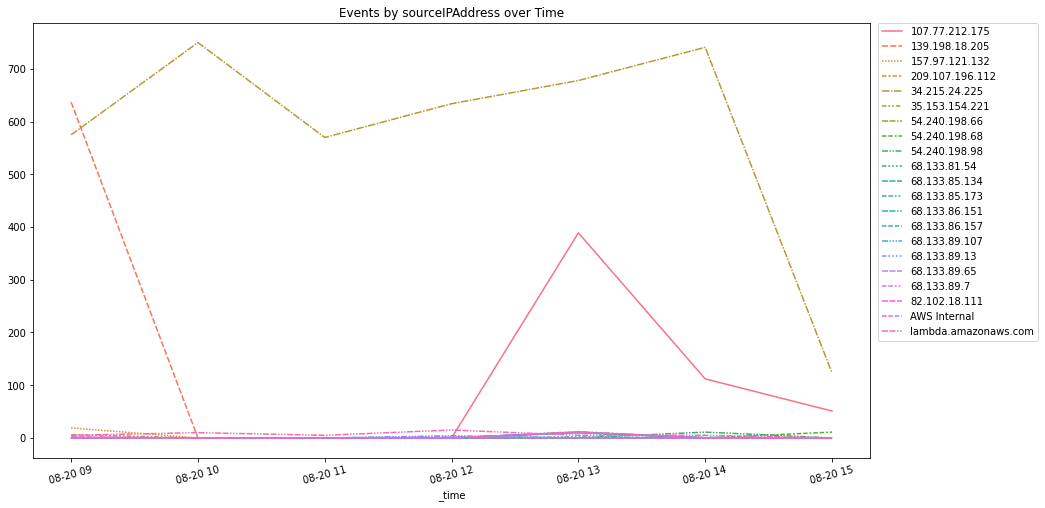

In [13]:

# Finally let's plot our data
plt.figure(figsize=(15,8))
ip_plot = sns.lineplot(data=df_aggr)
plt.xticks(rotation=15)
plt.title('Events by sourceIPAddress over Time')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)


plt.show()

In [31]:
# Finally, let's save our file:
fig = ip_plot.get_figure()
fig.savefig("./assets/images/sourceIPAddressFrequencyOverTime.png")